In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Downloads\CarPrice_Assignment.csv')

# Display basic info
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
# Check missing values
print(df.isnull().sum())

# Check data types
print(df.info())

# Drop 'CarName' as it's not useful for regression
df.drop('CarName', axis=1, inplace=True)

# Extract brand from car name (optional)
# df['brand'] = df['CarName'].apply(lambda x: x.split()[0])

# Convert categorical variables
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber',
                                 'carbody', 'drivewheel', 'enginelocation',
                                 'enginetype', 'cylindernumber', 'fuelsystem'],
                    drop_first=True)

# Separate features and target
X = df.drop(['car_ID', 'price'], axis=1)
y = df['price']


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 n

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Model Implementation

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler





In [5]:
# Scale the data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train models and store predictions
predictions = {}
for name, model in models.items():
    if name == 'Support Vector Regressor':
        model.fit(X_train_scaled, y_train)
        predictions[name] = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)

In [12]:
# Model Evaluation

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}
for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Identify best model
best_model_name = results_df['R2 Score'].idxmax()
print(f"\nBest performing model: {best_model_name}")


                          R2 Score           MSE          MAE
Linear Regression         0.892557  8.482008e+06  2089.382729
Decision Tree             0.894859  8.300272e+06  1886.321146
Random Forest             0.958012  3.314702e+06  1261.417451
Gradient Boosting         0.925104  5.912585e+06  1683.951892
Support Vector Regressor -0.099891  8.682982e+07  5697.657697

Best performing model: Random Forest


In [ ]:
# Random Forest Regressor is the best model because it predicts car prices more accurately than the other models. It has the lowest error values and the highest R² score, showing that it fits the data very well. This model works better because it combines the results of many decision trees, helping it understand complex patterns and avoid overfitting.

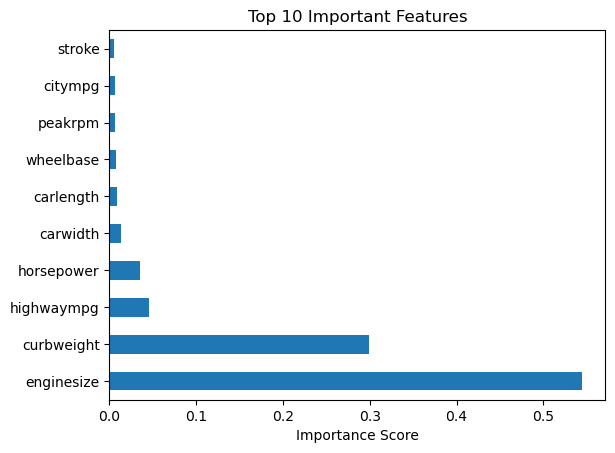

In [16]:
# Feature Importance 

# Use the best tree model for feature importance
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    best_model = models[best_model_name]
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    importances.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
    plt.xlabel("Importance Score")
    plt.show()
else:
    print("Feature importance is not available for this model.")



In [22]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)




Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [23]:
# Evaluate new model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Improved R2 Score:", r2_score(y_test, y_pred_rf))

Improved R2 Score: 0.9589628447253804
